In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Old Files

The following code contains the contents of the old DataFrames created.

In [80]:
X_train_old = pd.read_pickle("./processed_files/OLD/01b_train_X.pkl")
y_train_old = pd.read_pickle("./processed_files/OLD/01b_train_y.pkl")
X_test_old = pd.read_pickle("./processed_files/OLD/01b_test_X.pkl")
y_test_old = pd.read_pickle("./processed_files/OLD/01b_test_y.pkl")
print("X_train (old version):")
X_train_old

X_train (old version):


,ARR_MIN_OF_DAY_COS,JET(YN),WINGLETS(YN),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),NR_ENGINES,APPROACH_SPEED(KMH),WINGSPAN(M),LENGTH(M),...,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN
7876359,-0.176292,1,0,74.0,510.16078,8,3,255.576,47.335440,55.565040,...,0,0,0.0,0.0,3.0,3.0,2.0,0.000000,1.000000,0.984338
8281253,0.417745,1,1,102.0,650.17336,72,2,259.280,34.101024,44.509944,...,2,2,3.0,1.0,1.0,1.0,3.0,0.433884,-0.900969,-0.908564
11259811,0.227567,1,0,117.0,695.23488,68,2,257.428,28.446984,37.795200,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969,-0.973763
6592688,-0.554733,1,0,139.0,402.33500,57,2,257.428,28.446984,37.795200,...,0,0,1.0,3.0,1.0,3.0,3.0,0.974928,-0.222521,-0.832029
8970026,0.503484,1,0,186.0,975.26004,72,2,257.428,28.446984,37.795200,...,0,0,3.0,0.0,0.0,3.0,2.0,0.433884,-0.900969,-0.864005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7577632,-0.305184,1,1,107.0,891.57436,47,2,233.352,34.101024,33.838896,...,0,0,0.0,0.0,0.0,3.0,3.0,0.974928,-0.222521,0.952293
6856848,-0.908564,1,0,298.0,2042.25246,48,3,255.576,47.335440,55.565040,...,0,0,3.0,3.0,0.0,0.0,2.0,-0.974928,-0.222521,0.417745
10388189,-0.861970,1,0,108.0,891.57436,54,3,255.576,47.335440,55.565040,...,0,0,0.0,3.0,0.0,0.0,3.0,0.974928,-0.222521,0.506960
9936124,-0.537866,1,0,171.0,975.26004,62,3,255.576,47.335440,55.565040,...,0,0,3.0,3.0,3.0,0.0,0.0,0.781831,0.623490,0.843031


# Loading Old Reduced Files

The following code shows the files that use the reduced dimensional space.

## Important Note
Somehow the indeces of the reduced files were shuffled which makes them not usable from scratch with the target variable files without sorting correctly.
Therefore, I only used the previously loaded X-files and only loaded the columns of the reduced file-set and applyed the columns onto the previously loaded DataFrames to get the correct reduced versions with the right indices.

In [81]:
# Loading columns from reduced file and applying to X-data
old_reduced_labels = pd.read_pickle("./processed_files/OLD/01b_test_X_reduced.pkl").columns
X_train_old_red = X_train_old[old_reduced_labels]
X_test_old_red = X_test_old[old_reduced_labels]
# Using previously established y-data
y_train_old_red = y_train_old.copy()
y_test_old_red = y_test_old.copy()
X_train_old_red

,ARR_MIN_OF_DAY_COS,CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),APPROACH_SPEED(KMH),WINGSPAN(M),LENGTH(M),TAIL_HEIGHT(M),MTOW(KG),TEMP(C),...,EVENT_RA,EVENT_SN,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN
7876359,-0.176292,74.0,510.16078,8,255.576,47.335440,55.565040,17.800320,206384.360000,21.111111,...,0,0,0.0,0.0,3.0,3.0,2.0,0.000000,1.000000,0.984338
8281253,0.417745,102.0,650.17336,72,259.280,34.101024,44.509944,12.100560,93499.826144,26.555556,...,2,2,3.0,1.0,1.0,1.0,3.0,0.433884,-0.900969,-0.908564
11259811,0.227567,117.0,695.23488,68,257.428,28.446984,37.795200,9.043416,53523.856000,10.611111,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969,-0.973763
6592688,-0.554733,139.0,402.33500,57,257.428,28.446984,37.795200,9.043416,53523.856000,18.888889,...,0,0,1.0,3.0,1.0,3.0,3.0,0.974928,-0.222521,-0.832029
8970026,0.503484,186.0,975.26004,72,257.428,28.446984,37.795200,9.043416,53523.856000,27.777778,...,0,0,3.0,0.0,0.0,3.0,2.0,0.433884,-0.900969,-0.864005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7577632,-0.305184,107.0,891.57436,47,233.352,34.101024,33.838896,12.109704,76499.651576,17.777778,...,0,0,0.0,0.0,0.0,3.0,3.0,0.974928,-0.222521,0.952293
6856848,-0.908564,298.0,2042.25246,48,255.576,47.335440,55.565040,17.800320,206384.360000,13.277778,...,0,0,3.0,3.0,0.0,0.0,2.0,-0.974928,-0.222521,0.417745
10388189,-0.861970,108.0,891.57436,54,255.576,47.335440,55.565040,17.800320,206384.360000,9.388889,...,0,0,0.0,3.0,0.0,0.0,3.0,0.974928,-0.222521,0.506960
9936124,-0.537866,171.0,975.26004,62,255.576,47.335440,55.565040,17.800320,206384.360000,16.722222,...,0,0,3.0,3.0,3.0,0.0,0.0,0.781831,0.623490,0.843031


# Loading Old Files With Upsampling

The following code shows contents of the old files. These include upsampling the minority classes. Of course the test files need not be loaded again since they are not touched by upsampling.

## Important Note:
Upsampling data is near-useless since it can not be used for cross validation training. With previously upsampled data there would be data leak into validation sets while using cv.

In [82]:
X_train_old_US = pd.read_pickle("./processed_files/OLD/01c_train_X_RS.pkl")
y_train_old_US = pd.read_pickle("./processed_files/OLD/01c_train_y_RS.pkl")
#Test data does not need to be loaded again since upsampling should not touch test data.
X_test_old_US = X_test_old.copy()
y_test_old_US = y_test_old.copy()
X_train_old_US

,ARR_MIN_OF_DAY_COS,JET(YN),WINGLETS(YN),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),NR_ENGINES,APPROACH_SPEED(KMH),WINGSPAN(M),LENGTH(M),...,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN
0,-0.176292,1,0,74.0,510.16078,8,3,255.576,47.335440,55.565040,...,0,0,0.0,0.0,3.0,3.0,2.0,0.000000,1.000000,0.984338
1,0.417745,1,1,102.0,650.17336,72,2,259.280,34.101024,44.509944,...,2,2,3.0,1.0,1.0,1.0,3.0,0.433884,-0.900969,-0.908564
2,0.227567,1,0,117.0,695.23488,68,2,257.428,28.446984,37.795200,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969,-0.973763
3,-0.554733,1,0,139.0,402.33500,57,2,257.428,28.446984,37.795200,...,0,0,1.0,3.0,1.0,3.0,3.0,0.974928,-0.222521,-0.832029
4,0.503484,1,0,186.0,975.26004,72,2,257.428,28.446984,37.795200,...,0,0,3.0,0.0,0.0,3.0,2.0,0.433884,-0.900969,-0.864005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474778,-0.581249,1,0,126.0,243.01034,85,2,257.428,28.446984,37.795200,...,0,0,3.0,1.0,3.0,1.0,3.0,-0.433884,-0.900969,0.813726
474779,-0.577967,1,0,153.0,1372.76702,82,3,255.576,47.335440,55.565040,...,0,0,1.0,1.0,1.0,2.0,3.0,0.974928,-0.222521,0.816060
474780,-0.638665,1,0,233.0,2489.64898,59,2,261.132,34.314384,42.114216,...,0,0,3.0,1.0,1.0,1.0,1.0,-0.974928,-0.222521,-0.769485
474781,0.506960,1,0,157.0,729.03102,48,2,257.428,28.446984,37.795200,...,0,0,1.0,3.0,3.0,3.0,1.0,0.000000,1.000000,-0.861970


# Loading Old Reduced Files With Upsampling

Basically the same as above, but with the reduced labels saved in the pickle files.


In [83]:
old_red_us_labels = pd.read_pickle("./processed_files/OLD/01c_train_X_RS_reduced.pkl").columns
X_train_old_US_red = X_train_old_US[old_red_us_labels]
X_test_old_US_red = X_test_old_US[old_red_us_labels]
y_train_old_US_red = y_test_old_US.copy()
y_test_old_US_red = y_test_old_US.copy()
X_train_old_US_red

,ARR_MIN_OF_DAY_COS,CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),APPROACH_SPEED(KMH),WINGSPAN(M),LENGTH(M),TAIL_HEIGHT(M),MTOW(KG),TEMP(C),...,EVENT_RA,EVENT_SN,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN
0,-0.176292,74.0,510.16078,8,255.576,47.335440,55.565040,17.800320,206384.360000,21.111111,...,0,0,0.0,0.0,3.0,3.0,2.0,0.000000,1.000000,0.984338
1,0.417745,102.0,650.17336,72,259.280,34.101024,44.509944,12.100560,93499.826144,26.555556,...,2,2,3.0,1.0,1.0,1.0,3.0,0.433884,-0.900969,-0.908564
2,0.227567,117.0,695.23488,68,257.428,28.446984,37.795200,9.043416,53523.856000,10.611111,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969,-0.973763
3,-0.554733,139.0,402.33500,57,257.428,28.446984,37.795200,9.043416,53523.856000,18.888889,...,0,0,1.0,3.0,1.0,3.0,3.0,0.974928,-0.222521,-0.832029
4,0.503484,186.0,975.26004,72,257.428,28.446984,37.795200,9.043416,53523.856000,27.777778,...,0,0,3.0,0.0,0.0,3.0,2.0,0.433884,-0.900969,-0.864005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474778,-0.581249,126.0,243.01034,85,257.428,28.446984,37.795200,9.043416,53523.856000,19.388889,...,0,0,3.0,1.0,3.0,1.0,3.0,-0.433884,-0.900969,0.813726
474779,-0.577967,153.0,1372.76702,82,255.576,47.335440,55.565040,17.800320,206384.360000,15.805556,...,0,0,1.0,1.0,1.0,2.0,3.0,0.974928,-0.222521,0.816060
474780,-0.638665,233.0,2489.64898,59,261.132,34.314384,42.114216,12.624816,79015.726400,25.000000,...,0,0,3.0,1.0,1.0,1.0,1.0,-0.974928,-0.222521,-0.769485
474781,0.506960,157.0,729.03102,48,257.428,28.446984,37.795200,9.043416,53523.856000,18.888889,...,0,0,1.0,3.0,3.0,3.0,1.0,0.000000,1.000000,-0.861970


# Loading New Files

The following code shows the contents of the newly created DataFrames. These SHOULD implement majority class downsampling and lost 1 additional dimension.

In [84]:
X_train_new = pd.read_pickle("./processed_files/NEW/X_train_df.pkl")
y_train_new = pd.read_pickle("./processed_files/NEW/y_train_df.pkl")
X_test_new = pd.read_pickle("./processed_files/NEW/X_test_df.pkl")
y_test_new = pd.read_pickle("./processed_files/NEW/y_test_df.pkl")
X_train_new

,ARR_MIN_OF_DAY_COS,WINGLETS(YN),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),MTOW(KG),TEMP(C),REL_HUMIDITY(PERCENT),WIND_DRCT(DEG),WIND_SPEED(KMH),SEA_LEVEL_PRESSURE(MILLIBAR),...,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN
0,0.417745,1,102.0,72,93499.826144,26.555556,85.62,155.0,12.964,1015.7,...,2,2,3.0,1.0,1.0,1.0,3.0,0.433884,-0.900969,-0.908564
1,0.227567,0,117.0,68,53523.856000,10.611111,40.63,250.0,5.556,1023.5,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969,-0.973763
2,-0.554733,0,139.0,57,53523.856000,18.888889,17.78,350.0,24.076,1026.8,...,0,0,1.0,3.0,1.0,3.0,3.0,0.974928,-0.222521,-0.832029
3,0.503484,0,186.0,72,53523.856000,27.777778,58.43,200.0,7.408,1017.9,...,0,0,3.0,0.0,0.0,3.0,2.0,0.433884,-0.900969,-0.864005
4,-0.520780,1,184.0,66,78000.133912,4.388889,26.40,140.0,12.964,1037.8,...,0,0,0.0,0.0,0.0,0.0,3.0,0.000000,1.000000,-0.853691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245614,-0.953515,0,156.0,45,206384.360000,0.611111,66.06,310.0,12.964,1026.5,...,0,0,0.0,0.0,0.0,0.0,2.0,-0.781831,0.623490,-0.301346
245615,0.203970,0,86.0,74,206384.360000,27.777778,29.28,145.0,11.112,1015.8,...,0,0,0.0,3.0,3.0,0.0,0.0,-0.781831,0.623490,-0.978977
245616,-0.861970,0,108.0,54,206384.360000,9.388889,92.77,0.0,0.000,1020.4,...,0,0,0.0,3.0,0.0,0.0,3.0,0.974928,-0.222521,0.506960
245617,-0.537866,0,171.0,62,206384.360000,16.722222,86.11,80.0,12.964,1027.9,...,0,0,3.0,3.0,3.0,0.0,0.0,0.781831,0.623490,0.843031


# Checking differences between dimensions

In [85]:
old = X_train_old.columns
old_red = X_train_old_red.columns
old_US = X_train_old_US.columns
old_US_red = X_train_old_US_red.columns
new = X_train_new.columns

print(f"Original columns with length = {len(old)}:\n{list(old)}\n")
print(f"Regular minus old-reduced. Remaining length = {len(old_red)}:\n- Lost -\n{list(set(old)-set(old_red))}\n- Gained -\n{list(set(old_red)-set(old))}\n")
print(f"Old-reduced minus new-reduced. Remaining length = {len(new)}:\n- Lost -\n{list(set(old_red)-set(new))}\n- Gained -\n{list(set(new)-set(old_red))}")

Original columns with length = 40:
['ARR_MIN_OF_DAY_COS', 'JET(YN)', 'WINGLETS(YN)', 'CRS_ELAPSED_TIME(MINS)', 'DISTANCE(KM)', 'NR_PREV_ARR_FLIGHTS(1HR)', 'NR_ENGINES', 'APPROACH_SPEED(KMH)', 'WINGSPAN(M)', 'LENGTH(M)', 'TAIL_HEIGHT(M)', 'MTOW(KG)', 'TEMP(C)', 'REL_HUMIDITY(PERCENT)', 'WIND_DRCT(DEG)', 'WIND_SPEED(KMH)', '1HOUR_PRECIPITATION(INCH)', 'SEA_LEVEL_PRESSURE(MILLIBAR)', 'VISIBILITY(MILES)', 'FELT_TEMP(C)', 'EVENT_BR', 'EVENT_DZ', 'EVENT_FG', 'EVENT_FU', 'EVENT_GR', 'EVENT_GS', 'EVENT_HZ', 'EVENT_IC', 'EVENT_RA', 'EVENT_SG', 'EVENT_SN', 'EVENT_TS', '08L/26R', '08R/26L', '09L/27R', '09R/27L', '10/28', 'ARR_DAY_SIN', 'ARR_DAY_COS', 'ARR_MIN_OF_DAY_SIN']

Regular minus old-reduced. Remaining length = 27:
- Lost -
['WINGLETS(YN)', 'EVENT_TS', 'EVENT_GR', 'EVENT_BR', 'EVENT_FG', 'EVENT_GS', 'EVENT_IC', 'EVENT_FU', 'EVENT_HZ', 'EVENT_DZ', 'EVENT_SG', 'JET(YN)', 'NR_ENGINES']
- Gained -
[]

Old-reduced minus new-reduced. Remaining length = 26:
- Lost -
['1HOUR_PRECIPITATION(INCH)', 

# Y-data distributions

We do not need all distributions sine all that only reduce dimensional space do not have an influence on the y-data space
Interesting DataFrames are:
- y-normal
- y-upsampled
- y-new

All for train and test set

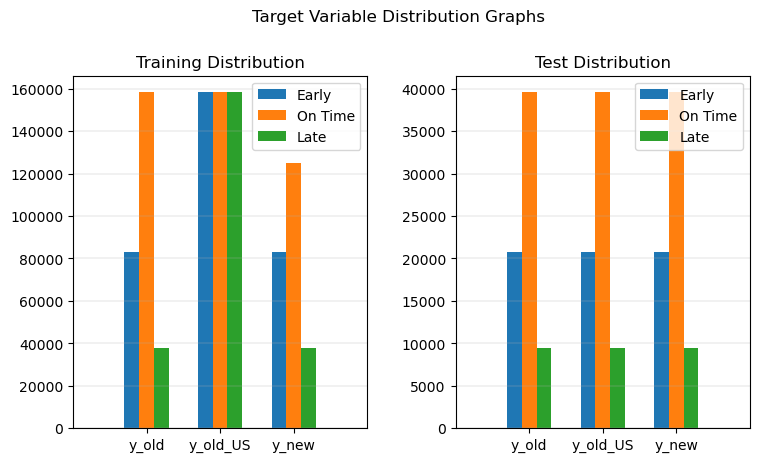

In [156]:
#Train targets
y_train_old_counts = y_train_old.value_counts()
y_train_old_US_counts = y_train_old_US.value_counts()
y_train_new_counts = y_train_new.value_counts()
# Test targets
y_test_old_counts = y_test_old.value_counts()
y_test_old_US_counts = y_test_old_US.value_counts()
y_test_new_counts = y_test_new.value_counts()


fig, axes = plt.subplots(1,2)
fig.suptitle("Target Variable Distribution Graphs")
fig.tight_layout(pad= 2)
fig.set_figwidth(8)
width = 0.2
x = np.arange(3)

a0 = axes[0]
a0.set_title("Training Distribution")
a0.set_xlim(left = -1, right = 3)
a0.set_xticks(x)
a0.set_xticklabels(["y_old", "y_old_US", "y_new"])
a0.bar(x = x - width, height = [y_train_old_counts[0], y_train_old_US_counts[0], y_train_new_counts[0]], width = width, label="Early")
a0.bar(x = x, height = [y_train_old_counts[1], y_train_old_US_counts[1], y_train_new_counts[1]], width = width, label = "On Time")
a0.bar(x = x+width , height = [y_train_old_counts[2], y_train_old_US_counts[2], y_train_new_counts[2]], width = width, label = "Late")
a0.grid(True, axis="y", linewidth=0.25)
a0.legend()

a1 = axes[1]
a1.set_title("Test Distribution")
a1.set_xlim(left = -1, right = 3)
a1.set_xticks(x)
a1.set_xticklabels(["y_old", "y_old_US", "y_new"])
a1.bar(x = x - width, height = [y_test_old_counts[0], y_test_old_US_counts[0], y_test_new_counts[0]], width = width, label="Early")
a1.bar(x = x, height = [y_test_old_counts[1], y_test_old_US_counts[1], y_test_new_counts[1]], width = width, label = "On Time")
a1.bar(x = x+width , height = [y_test_old_counts[2], y_test_old_US_counts[2], y_test_new_counts[2]], width = width, label = "Late")
a1.grid(True, axis="y", linewidth=0.25)
a1.legend()